# <font color='red'>Backpropagation</font>


In this assignment, you will implement Backpropagation from scratch. You will then verify the correctness of the your implementation using a "grader" function/cell (provided by us) which will match your implmentation.

The grader fucntion would help you validate the correctness of your code. 

Please submit the final Colab notebook in the classroom ONLY after you have verified your code using the grader function/cell.




## <font color='red'>Loading data </font>

In [1]:
import pickle
import numpy as np
from math import exp
from tqdm import tqdm
from statistics import mean
import matplotlib.pyplot as plt

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


<font color='blue'><b>Check this video for better understanding of the computational graphs and back propagation</font>

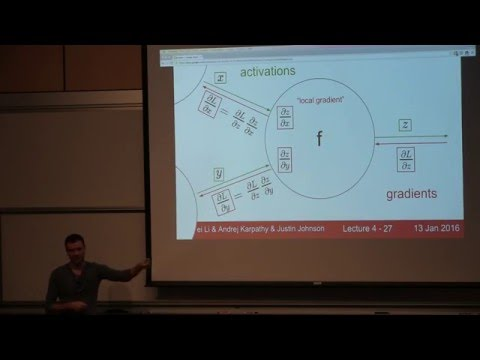

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="1000",height="500")

# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

## <font color='red'>Task 1: Implementing Forward propagation, Backpropagation and Gradient checking </font>

# <font color='red'>Task 1.1 </font>

## <font color='blue'>Forward propagation </font>


*  <b>
    Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <img src='https://i.imgur.com/vMyCsd9.png'>

In [3]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    
    sigmoid_ = 1 / (1 + exp(-z))
    
    return sigmoid_

In [4]:
def grader_sigmoid(z):
  #if you have written the code correctly then the grader function will output true

  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True

grader_sigmoid(2)

True

In [5]:
def forward_propagation(x, y, w):
    
        '''In this function, we will compute the forward propagation '''
        
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds
        #                                     to w2 in graph,..., W[8] corresponds to w9 in graph.
        
#       exp
        val_1 = (w[0] * x[0] + w[1] * x[1]) * (w[0] * x[0] + w[1] * x[1]) + w[5]
        part_1 = np.exp(val_1)
        
#       tanh
        val_2 = part_1 + w[6]
        part_2 = np.tanh(val_2)
        
#       sigmoid
        val_3 = w[2] * x[2]
        val_4 = (w[3] * x[3]) + (w[4] * x[4])
        part_3 = sigmoid((val_4 * np.sin(val_3)) + w[7])                
        
#       dy_pred
        y_pred = part_2 + (part_3 * w[8])
        dy_pred = -2 * (y - y_pred)
        
#       loss
        loss = np.square(y - y_pred)
        
        forward_dict={}
        forward_dict['exp']= part_1
        forward_dict['tanh'] = part_2
        forward_dict['sigmoid'] = part_3
        forward_dict['loss'] = loss
        forward_dict['dy_pred'] = dy_pred
        forward_dict['w2_f3']= val_3
        
        return forward_dict

In [6]:
def grader_forwardprop(data):
    
    dl = (data['dy_pred'] == -1.9285278284819143)
    loss = (data['loss'] == 0.9298048963072919)
    part1 = (data['exp'] == 1.1272967040973583)
    part2 = (data['tanh'] == 0.8417934192562146)
    part3 = (data['sigmoid'] == 0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True

w = np.ones(9) * 0.1

d1 = forward_propagation(X[0], y[0], w)

grader_forwardprop(d1)

True

# <font color='red'>Task 1.2 </font>

## <font color='blue'>Backward propagation</font>

In [7]:
def backward_propagation(x, y, w, forward_dict):
     
    '''In this function, we will compute the backward propagation '''

    dw1 = forward_dict['dy_pred'] * (1 - np.square(forward_dict['tanh'])) * forward_dict['exp'] \
                                                        * 2 * ((w[0] * x[0] + w[1] * x[1]) * x[0])
    
    
    dw2 = forward_dict['dy_pred'] * (1 - np.square(forward_dict['tanh'])) * forward_dict['exp'] \
                                                        * 2 * ((w[1] * x[1] + w[0] * x[0]) * x[1])
    
    dw3 = forward_dict['dy_pred'] * w[8] * forward_dict['sigmoid'] * (1 - forward_dict['sigmoid']) \
                            * ((x[3] * w[3] + x[4] * w[4]) * x[2]) * np.cos(forward_dict['w2_f3'])
    
    dw4 = forward_dict['dy_pred'] * w[8] * forward_dict['sigmoid'] * (1 - forward_dict['sigmoid']) \
                                                            * x[3] * np.sin(forward_dict['w2_f3'])    
    
    dw5 = forward_dict['dy_pred'] * w[8] * forward_dict['sigmoid'] * (1 - forward_dict['sigmoid']) \
                                                            * x[4] * np.sin(forward_dict['w2_f3'])
    
    dw6 = forward_dict['dy_pred'] * (1 - np.square(forward_dict['tanh'])) * forward_dict['exp']
    
    dw7 = forward_dict['dy_pred'] * (1 - np.square(forward_dict['tanh']))
    
    dw8 = forward_dict['dy_pred'] * w[8] * forward_dict['sigmoid'] * (1- forward_dict['sigmoid'])
    
    dw9 = forward_dict['sigmoid'] * forward_dict['dy_pred']
    
    backward_dict = {}
    
    backward_dict['dw1'] = dw1
    backward_dict['dw2'] = dw2
    backward_dict['dw3'] = dw3
    backward_dict['dw4'] = dw4
    backward_dict['dw5'] = dw5
    backward_dict['dw6'] = dw6
    backward_dict['dw7'] = dw7
    backward_dict['dw8'] = dw8
    backward_dict['dw9'] = dw9    
    
    return backward_dict

In [8]:
def grader_backprop(data):
    
    dw1=(np.round(data['dw1'],6)==-0.229733)
    dw2=(np.round(data['dw2'],6)==-0.021408)
    dw3=(np.round(data['dw3'],6)==-0.005625)
    dw4=(np.round(data['dw4'],6)==-0.004658)
    dw5=(np.round(data['dw5'],6)==-0.001008)
    dw6=(np.round(data['dw6'],6)==-0.633475)
    dw7=(np.round(data['dw7'],6)==-0.561942)
    dw8=(np.round(data['dw8'],6)==-0.048063)
    dw9=(np.round(data['dw9'],6)==-1.018104)
    
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True

w = np.ones(9)*0.1

forward_dict = forward_propagation(X[0],y[0],w)

backward_dict = backward_propagation(X[0],y[0],w,forward_dict)

grader_backprop(backward_dict)

True

# <font color='red'>Task 1.3 </font>

 ## <font color='blue'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>
 (Write your code in <font color='blue'> def gradient_checking()</font>)

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
<b>NOTE: you can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not you have bug in your code
</pre></b>

In [9]:
def gradient_checking(x, y, w, eps):

    # compute the dict value using forward_propagation()
    # compute the actual gradients of W using backword_propagation()
    forward_dict = forward_propagation(x, y, w)
    backward_dict = backward_propagation(x, y, w, forward_dict)
    
    #we are storing the original gradients for the given datapoints in a list
    
    original_gradients_list = list(backward_dict.values())
        
    approx_gradients_list=[]
    
    '''
    now we have to write code for approx gradients, here you have to make sure that you
                                    update only one weight at a time
    write your code here and append the approximate gradient value for each weight in  approx_gradients_list
    '''
    
    for i in range(len(w)):
        
        w_original = w[i]
        w[i] = w_original + eps
        for_pos_updated = forward_propagation(x, y, w)
        updated_loss_pos = for_pos_updated['loss']
        
        w[i] = w_original - eps
        for_neg_updated = forward_propagation(x, y, w)
        updated_loss_neg = for_neg_updated['loss']
        
        dw_approx = (updated_loss_pos - updated_loss_neg) / ( 2 * eps)
        approx_gradients_list.append(dw_approx)
        
    #performing gradient check operation
    original_gradients_list = np.array(original_gradients_list)
    approx_gradients_list = np.array(approx_gradients_list)
    gradient_check_value = (original_gradients_list - approx_gradients_list) / \
                                                (original_gradients_list + approx_gradients_list)
    
    return gradient_check_value

In [10]:
def grader_grad_check(value):
    
    print(value)
    assert(np.all(value <= 10**-3))
    
    return True 

w = [ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768,
   0.00114524,  0.00684168,  0.02242521,  0.01296444]

eps = 10**-7

value = gradient_checking(X[0], y[0], w, eps)
grader_grad_check(value)

[-1.73921918e-08  1.28741906e-05 -2.55164399e-04 -1.05871856e-05
 -1.95446016e-04 -1.16536595e-10 -9.63625495e-08 -1.06774472e-07
 -1.43339489e-08]


True

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 2  optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* The weights have been initialized from normal distribution with mean=0 and std=0.01. The initialization of weights is very important otherwiswe you can face vanishing gradient and exploding gradients problem.

**Check below video for reference purpose**

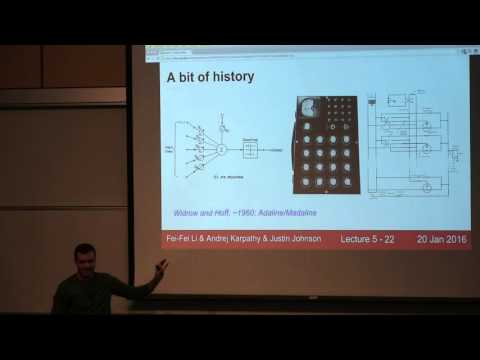

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-20):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  
</pre>

## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights<br><br>


**Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False .Recheck your logic for that variable .**

### <font color='blue'>2.1 Algorithm with Vanilla update of weights</font>

- https://stats.stackexchange.com/a/295181<br>
" Vanilla means standard, usual, or unmodified version of something. Vanilla gradient descent means the basic gradient descent algorithm without any bells or whistles."


- https://ruder.io/optimizing-gradient-descent/<br>
Vanilla gradient descent, aka batch gradient descent, computes the gradient of the cost function w.r.t. to the parameters θ for the entire training dataset: <br><br>
$\theta = \theta - \eta * \triangledown_{\theta} J(\theta)$


- https://www.analyticsvidhya.com/blog/2017/03/introduction-to-gradient-descent-algorithm-along-its-variants/<br><br>Pseudocode :
```py
update = learning_rate * gradient_of_parameters
parameters = parameters - update
```

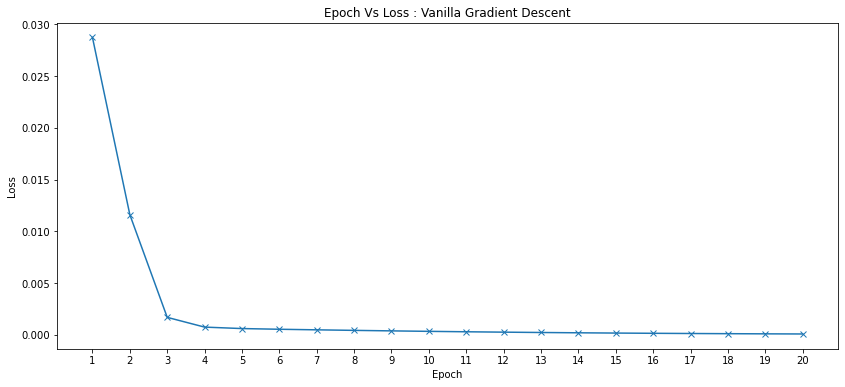

In [12]:
weight = np.random.normal(scale = 0.01, size =9)

learning_rate = 0.1 

mean_v_loss = []

epochs = range(1, 21)

for epoch in epochs:
    
    v_loss = []    
    for i in range(len(X)):

        forward_dict_ = forward_propagation(X[i], y[i], weight)
        backward_dict_ = backward_propagation(X[i], y[i], weight, forward_dict_)
        
        for j in range(9):
            
            dws = f'dw{j+1}'
            
            weight[j] = weight[j] - learning_rate * backward_dict_[dws]

        v_loss.append(forward_dict_['loss'])
    mean_v_loss.append(mean(v_loss))

    
# Visualizing the Epoch-Loss curve

plt.figure(figsize = (14, 6))
plt.plot(epochs, mean_v_loss, marker = 'x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1,21))
plt.title('Epoch Vs Loss : Vanilla Gradient Descent')
plt.show()

### <font color='blue'>2.2 Algorithm with Momentum update of weights</font>

<img src='https://i.imgur.com/gyPSXhS.png'>

Here Gamma referes to the momentum coefficient, eta is leaning rate and v_t is moving average of our gradients at timestep t

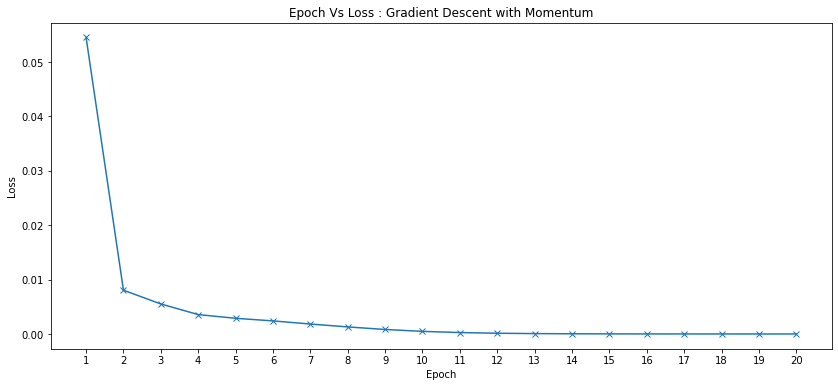

In [13]:
'''
Momentum update
v = mu * v - learning_rate * dx # integrate velocity
x += v # integrate position

learning_rate & mu from here : https://cs231n.github.io/neural-networks-3/
'''

weight = np.random.normal(scale = 0.01, size = 9)

learning_rate = 0.1

mu = 0.9

mean_momentum_loss = []

v_s = np.zeros(9)

epochs = range(1, 21)

for epoch in epochs:

    momentum_loss = []    
    for i in range(len(X)):

        forward_dict_ = forward_propagation(X[i], y[i], weight)
        backward_dict_ = backward_propagation(X[i], y[i], weight, forward_dict_)
                
        for j in range(9):
            
            dws = f'dw{j+1}'
            
            v_s[j] = (mu * v_s[j]) + (learning_rate * backward_dict_[dws])
            weight[j] = weight[j] - v_s[j]

        momentum_loss.append(forward_dict_['loss'])
    mean_momentum_loss.append(mean(momentum_loss))

# Visualizing the Epoch-Loss curve

plt.figure(figsize = (14, 6))
plt.plot(epochs, mean_momentum_loss, marker = 'x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1,21))
plt.title('Epoch Vs Loss : Gradient Descent with Momentum')
plt.show()

### <font color='blue'>2.3 Algorithm with Adam update of weights</font>

<img src='https://i.imgur.com/GDR8UFP.jpg'>

```py
m = beta1*m + (1-beta1)*dx
mt = m / (1-beta1**t)
v = beta2*v + (1-beta2)*(dx**2)
vt = v / (1-beta2**t)
x += - learning_rate * mt / (np.sqrt(vt) + eps)
```

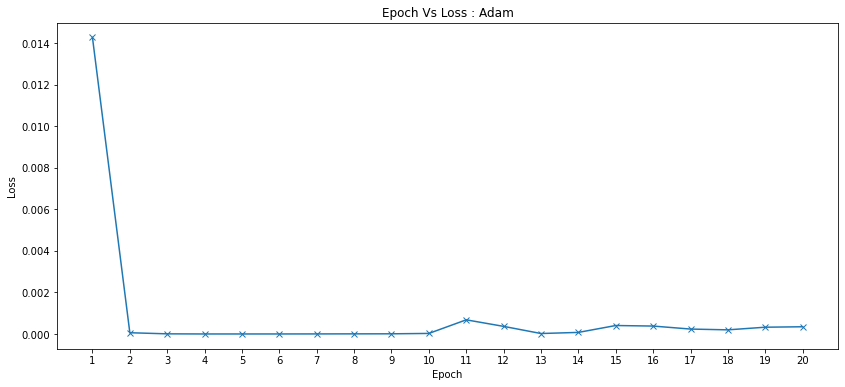

In [14]:
eps = 1e-8
beta_1 = 0.9
beta_2 = 0.999
learning_rate = 0.1
weight = np.random.normal(scale = 0.1, size =9)

v_s = np.zeros(9)
m_s = np.zeros(9)
v_hat = np.zeros(9)
m_hat = np.zeros(9)

mean_adam_loss = []

epochs = range(1, 21)
for epoch in epochs:
    
    adam_loss = []    
    for i in range(len(X)):
        
        forward_dict_ = forward_propagation(X[i], y[i], weight)
        backward_dict_ = backward_propagation(X[i], y[i], weight, forward_dict_)
        
        for j in range(9):
            
            dws = f'dw{j+1}'
            
            m_s[j] = (beta_1 * m_s[j]) + ((1 - beta_1) * backward_dict_[dws])
        
            m_hat[j] = m_s[j] / (1 - (beta_1 ** epoch))
            
            v_s[j] = (beta_2 * v_s[j]) + ((1 - beta_2) * (backward_dict_[dws] ** 2))
            
            v_hat[j] = v_s[j] / (1 - (beta_2 ** epoch))

            weight[j] = weight[j] - ((learning_rate * m_hat[j]) / np.sqrt(v_hat[j] + eps))

        adam_loss.append(forward_dict_['loss'])
    mean_adam_loss.append(mean(adam_loss))     

# Visualizing the Epoch-Loss curve

plt.figure(figsize = (14, 6))
plt.plot(epochs, mean_adam_loss, marker = 'x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, 21))
plt.title('Epoch Vs Loss : Adam')
plt.show()

## <font color='blue'>Comparision plot between epochs and loss with different optimizers. Make sure that loss is conerging with increaing epochs</font>

<font color='blue'><b>You can go through the following blog to understand the implementation of other optimizers .</font>
   <br> [Gradients update blog](https://cs231n.github.io/neural-networks-3/) </br>

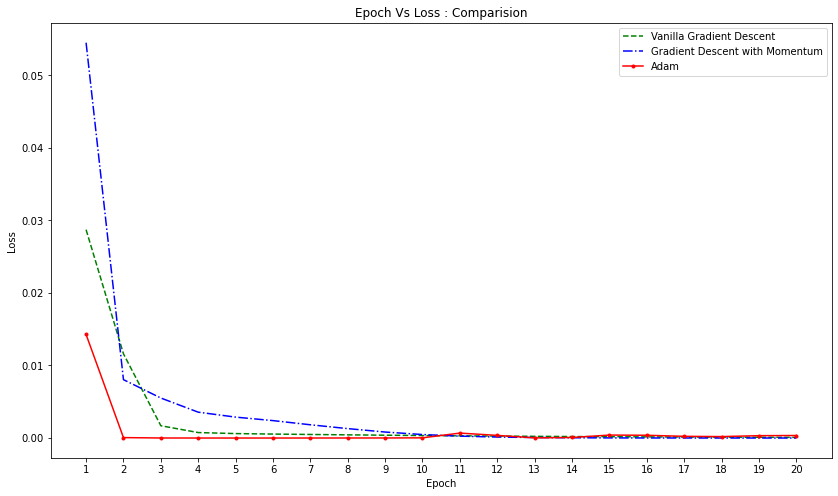

In [15]:
plt.figure(figsize = (14, 8))

plt.plot(epochs, mean_v_loss, c = 'g', linestyle = '--', label = 'Vanilla Gradient Descent')
plt.plot(epochs, mean_momentum_loss, c = 'b', linestyle = '-.', label = 'Gradient Descent with Momentum')
plt.plot(epochs, mean_adam_loss, c = 'r', linestyle = '-', marker = '.', label = 'Adam')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, 21))
plt.title('Epoch Vs Loss : Comparision')
plt.legend()
plt.show()

**<font color = 'green'> Observation</font>**

- From the above curves it is clear the **Adam** optimizer converges fast.
- The initial loss for **Vanilla gradient descent** is higher than **Adam** optimizer.
- Eventough the **Gradent descent with momentum** started with comparitively huge loss, it converged fast.
- The loss from **Adam** became lower than any other method in starting epochs, ie from `2 to 10`.